In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [35]:
from sklearn.linear_model import LinearRegression

In [37]:
n = 20
x = np.linspace(0, 20, n)
x = x[:, np.newaxis]
y = 1.5*x + 4 + np.random.randn(n, 1)

In [38]:
class LinearRegressionCustom:
    """Multiple linear regression model
    """

    def __init__(self, lrp=10e-5, max_iter=10000, fit_threshold=10e-2):
        self.lrp = lrp
        self.max_iter = max_iter
        self.fit_threshold = fit_threshold

    def fit(self, X, y):
        n = X.shape[0]
        p = X.shape[1]
        X = np.concatenate((np.ones((n, 1)), X), axis=1)
        # initialize all coefficients as 0
        self.coefs = np.zeros((p + 1, 1))
        for _ in range(self.max_iter):
            h = np.matmul(X, self.coefs)
            residuals = h - y
            self.coefs -= self.lrp/n*np.matmul(X.T, residuals)
        return self
    
    def fit2(self, X, y):
        n = X.shape[0]
        p = X.shape[1]
        X = np.concatenate((np.ones((n, 1)), X), axis=1)
        # initialize all coefficients as 0
        self.coefs = np.zeros((p + 1, 1))
        lastcost = 10
        diff = 10
        while diff > self.fit_threshold:
            h = np.matmul(X, self.coefs)
            residuals = h - y
            cost = np.mean(np.square(residuals))
            diff = abs(lastcost - cost)
            lastcost = cost
            self.coefs -= self.lrp/n*np.matmul(X.T, residuals)
        return self

    def predict(self, X):
        pass

In [39]:
lr = LinearRegressionCustom(lrp=5e-05, fit_threshold=10e-9)
lr.fit2(x, y)
lr.coefs

array([[3.89837158],
       [1.50806649]])

In [40]:
lrofi = LinearRegression()
lrofi.fit(x, y)
print(lrofi.intercept_, lrofi.coef_, sep='\n')

[3.93561226]
[[1.50533972]]


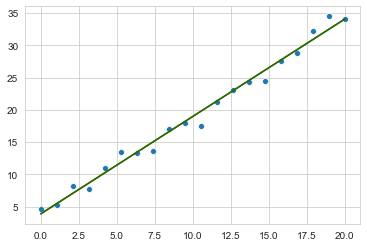

In [41]:
fig, ax = plt.subplots()
sns.scatterplot(x=x[:,0], y=y[:,0], ax=ax)
ax.plot(x[:,0], lr.coefs[0] + lr.coefs[1]*x[:,0], color='red')
ax.plot(x[:,0], lrofi.predict(x), color='green')

In [53]:
blood = pd.read_excel('mlr02.xls', names=['Blood pressure', 'Age', 'Weight (pounds)'])
blood['Weight (kg)'] = blood['Weight (pounds)']*0.45
blood.drop('Weight (pounds)', axis=1, inplace=True)
blood

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,Blood pressure,Age,Weight (kg)
0,132,52,77.85
1,143,59,82.80
2,153,67,87.30
3,162,73,94.95
4,154,64,88.20
5,168,74,99.00
6,137,54,84.60
7,149,61,84.60
8,159,65,93.15
9,128,46,75.15


In [47]:
X = blood[['Age', 'Weight (kg)']]
y = blood['Blood pressure']

In [48]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
from sklearn.metrics import r2_score
print(r2_score(y, lr.predict(X)))

0.9768471041502091


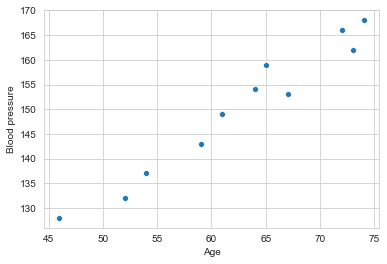

In [51]:
fig, ax = plt.subplots()
sns.scatterplot(data=blood, x='Age', y='Blood pressure', ax=ax, color=)

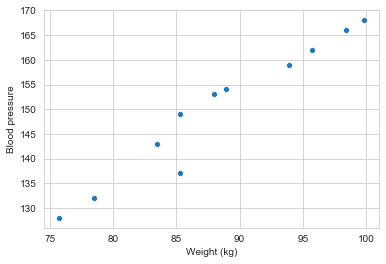

In [52]:
fig, ax = plt.subplots()
sns.scatterplot(data=blood, x='Weight (kg)', y='Blood pressure', ax=ax)